In [7]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import pickle
from ElectionForecasting.src.root import ROOT_DIR
from ElectionForecasting.src.config import party_order

In [22]:

data_store = 'data/interim/'
scenario = ''
interim_data_folder = Path(f"{ROOT_DIR}/{data_store}/{scenario}/")
processed_data_folder = Path(f"{interim_data_folder}/pickles")
def read_pickle(pickle_path):
    try:
        with open(pickle_path, 'rb') as f:
            forecasts = pickle.load(f)
    except FileNotFoundError:
        print(f"File not found: {pickle_path}")
    return forecasts
def get_avg_performance(forecast_type):
    pickle_path = processed_data_folder / f'{forecast_type}_forecasts.pkl'
    forecasts = read_pickle(pickle_path)
    mae_sum = 0
    rmse_sum = 0
    n_total = 0
    for year, preds in forecasts.items():
        for p in preds.keys():
            y = preds[p]['y']
            y_pred = preds[p]['y_pred']
            mae_sum += mean_absolute_error(y, y_pred)
            rmse_sum += sqrt(mean_squared_error(y, y_pred))
            n_total += 1
    avg_mae = mae_sum / n_total
    avg_rmse = rmse_sum / n_total

    return avg_mae, avg_rmse
def plot_predictions(forecast_type, year):
    pickle_path = processed_data_folder / f'{forecast_type}_forecasts.pkl'
    forecasts = read_pickle(pickle_path)
    dates = forecasts[year]['cc_poll_share']['date']
    for p in forecasts[year].keys():
        plt.plot(dates, forecasts[year][p]['y'])
        plt.plot(dates, forecasts[year][p]['y_pred'])
forecast_type = 'PF'
avg_mae, avg_rmse = get_avg_performance(forecast_type)
avg_mae, avg_rmse

(0.01483970109394362, 0.01757304581310932)

In [9]:
share_cols = [p+'_poll_share' for p in party_order]

In [13]:
raw_poll_data = pd.read_csv(
    f'{ROOT_DIR}/data/dataland/dataland_polls_1984_2023.csv'
)
raw_poll_data['date_conducted'] = pd.to_datetime(
    raw_poll_data['date_conducted']
)
raw_poll_data.set_index('date_conducted', inplace=True)
raw_poll_data = raw_poll_data[raw_poll_data.geography == 'National'][share_cols]

(0.005375915851272019, 0.006800045562701342)

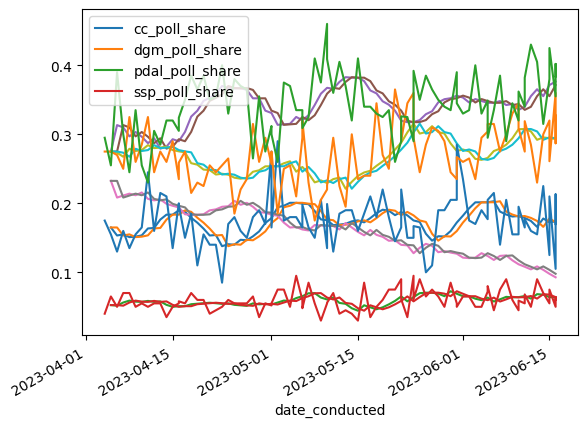

In [31]:
forecast_type = 'GAM'
avg_mae, avg_rmse = get_avg_performance(forecast_type)
plot_predictions(forecast_type, '2023')
ax=plt.gca()
raw_poll_data[raw_poll_data.index > '2023'].plot(ax=ax)
avg_mae, avg_rmse

In [15]:
pickle_path = processed_data_folder / f'{forecast_type}_forecasts.pkl'
try:
    with open(pickle_path, 'rb') as f:
        gam_forecasts = pickle.load(f)
except FileNotFoundError:
    print(f"File not found: {pickle_path}")
mae_sum = 0
rmse_sum = 0
n_total = 0
for year, preds in gam_forecasts.items():
    for i, p in enumerate(preds.keys()):
        y = preds[p]['y']
        y_pred = preds[p]['y_pred'][:,i]
        mae_sum += mean_absolute_error(y, y_pred)
        rmse_sum += sqrt(mean_squared_error(y, y_pred))
        n_total += 1
avg_mae = mae_sum / n_total
avg_rmse = rmse_sum / n_total
plot_predictions(forecast_type, '2023')
avg_mae, avg_rmse

KeyError: 'key of type tuple not found and not a MultiIndex'